In [155]:
# Import required libraries and dependencies

import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import hvplot.pandas


In [156]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [157]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [158]:
## Use the `StandardScaler` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

# Review the scaled data
scaled_data[:5]


array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [159]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
crypto_names = market_data_df.index
scaled_df['coin_id'] = crypto_names

# Set the coinid column as index
scaled_df.set_index('coin_id', inplace=True)

# Display sample data
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [160]:
# ! Set the environment variable to avoid the warning
os.environ["OMP_NUM_THREADS"] = "1"

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')


In [161]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `crypto_scaled_df`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364


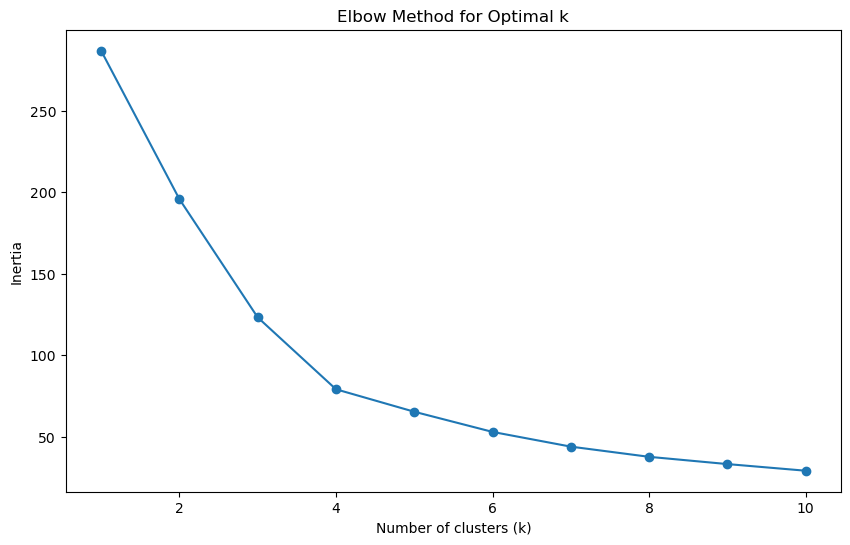

In [162]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

# Plot the elbow curve
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [163]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Assuming 4 is the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=1)

In [164]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [165]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(scaled_df)

# View the resulting array of cluster values.
predicted_clusters

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [166]:
# Create a copy of the DataFrame
market_data_with_clusters = market_data_df.copy()

In [167]:
# Add a new column to the DataFrame with the predicted clusters
market_data_with_clusters['Cluster'] = predicted_clusters

# Display sample data
market_data_with_clusters.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,1
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,1
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


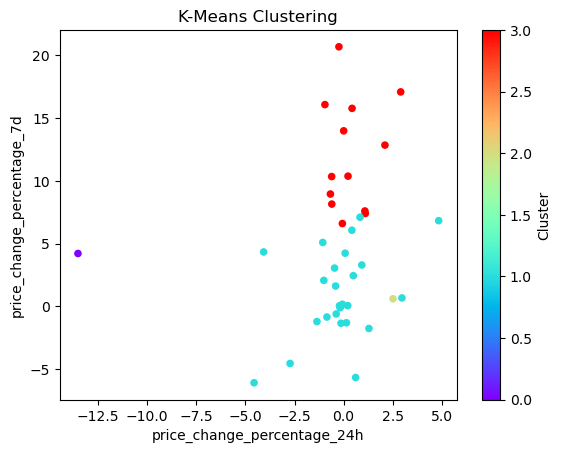

In [168]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scatter_plot = market_data_with_clusters.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='Cluster',
    colormap='rainbow',
    title="K-Means Clustering"
)

plt.show()


### Optimize Clusters with Principal Component Analysis.

In [169]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [170]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
# Use the PCA model with fit_transform to reduce to three principal components
crypto_pca = pca.fit_transform(scaled_df)


# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [171]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  The total explained variance of the three principal components is 88%. This means that when we apply PCA, we retain 89.49% of the data's original information in just three components. Here's the breakdown:

First Component: 37.19%
Second Component: 34.70%
Third Component: 17.60%
So, combined, they explain 89.49% of the variance. This substantial retention of information indicates that our data dimensionality is effectively reduced with minimal loss of information.

In [172]:
# Create a new DataFrame with the PCA data

# Creating a DataFrame with the PCA data
crypto_pca_df = pd.DataFrame(crypto_pca, columns=["PC1", "PC2", "PC3"])

# Copy the crypto names from the original data
crypto_pca_df["coin_id"] = market_data_df.index

# Set the coinid column as index
crypto_pca_df = crypto_pca_df.set_index("coin_id")

# Display sample data
crypto_pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [173]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k_pca:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(crypto_pca_df)
    inertia_pca.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {'k': k_pca, 'inertia': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

# Display the DataFrame
pca_elbow_df.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251


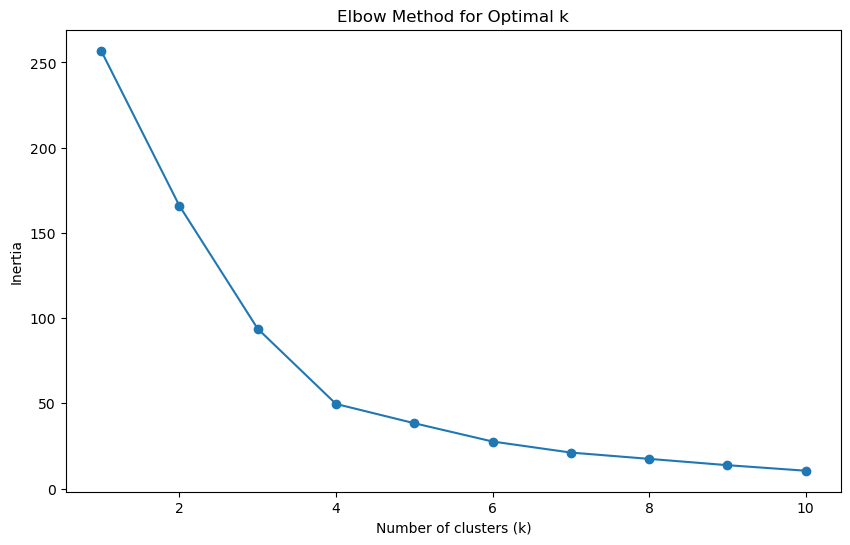

In [174]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(pca_elbow_df['k'], pca_elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best value for k


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No, it does not differ. Both the PCA-transformed data and the original data suggest that k=4 is the optimal number of clusters.









### Cluster Cryptocurrencies with K-means Using the PCA Data

In [175]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4  # Assuming 4 is the best value for k
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)


In [176]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(crypto_pca_df)


KMeans(n_clusters=4, random_state=42)

In [177]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_pca.predict(crypto_pca_df)

# Print the resulting array of cluster values
predicted_clusters_pca


array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0])

In [178]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_with_clusters = crypto_pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
crypto_pca_with_clusters['Cluster'] = predicted_clusters_pca

# Display sample data
crypto_pca_with_clusters.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [190]:
# Fit the KMeans model using the PCA data
model_2 = KMeans(n_clusters=4, random_state=1)
model_2.fit(crypto_pca_df)

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_2 = model_2.predict(crypto_pca_df)

# Copy the PCA dataframe
crypto_pca_df_copy = crypto_pca_df.copy()

# Ensure the 'crypto_clusters' column is added correctly to the DataFrame
crypto_pca_df_copy['crypto_clusters'] = clusters_2
# Create a scatter plot using hvPlot by setting x="PC1" and y="PC2"
# Color the graph points with the labels found using K-Means and
# add the crypto name in the hover_cols parameter to identify
# the cryptocurrency represented by each data point.
crypto_pca_plot = crypto_pca_df_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="crypto_clusters",
    title="K-Means Clustering with PCA",
    hover_cols=["coin_id"]
)

crypto_pca_plot



:NdOverlay   [crypto_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [210]:
# Use the columns from the original scaled DataFrame as the index


ValueError: Shape of passed values is (3, 7), indices imply (3, 3)

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    